## Pre-Processing the data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('DATASET.xlsx')

In [3]:
df.head()

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [4]:
# Fixing Sec_92 as it has only 9 values instead of 10
df.iloc[918:919,2:3] = 722.0
df.loc[918.5] = df.iloc[918]
df = df.sort_index().reset_index(drop=True)
df.loc[919 , 'year'] = 10
df.iloc[910:921]

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
910,Sec_92,1,722.0,838.0,2.1,959.0,29,111,2352,174,0.0,8.2,4.0,2,0.592
911,NaN,2,722.0,1059.1,2.0,1112.0,27,106,3317,222,0.0,17.2,8.0,2,0.618
912,NaN,3,722.0,868.7,2.2,909.2,37,108,4349,292,0.0,22.9,9.0,3,0.635
913,NaN,4,722.0,859.1,3.8,639.0,21,116,4528,304,0.0,34.1,11.0,3,0.646
914,NaN,5,722.0,872.9,2.2,998.0,26,112,2780,335,0.0,54.4,17.0,6,0.664
915,NaN,6,722.0,933.5,3.2,780.4,19,115,2910,350,0.0,87.3,25.0,7,0.704
916,NaN,7,722.0,975.6,2.8,748.8,18,111,2910,385,0.0,122.3,26.0,7,0.747
917,NaN,8,722.0,1035.0,1.1,1220.0,20,111,2700,420,2.2,142.3,27.0,8,1.021
918,NaN,9,722.0,1124.3,2.6,779.7,28,107,2700,455,4.6,156.1,29.0,11,1.035
919,NaN,10,722.0,1124.3,2.6,779.7,28,107,2700,455,4.6,156.1,29.0,11,1.035


In [5]:
#Changing first column name to Section_Name
df.rename(columns = {'Unnamed: 0' : "Section_Name"} , inplace = True)

In [6]:
df.columns

Index(['Section_Name', 'year', 'Para-1', 'Para-2', 'Para-3', 'Para-4',
       'Para-5', 'Para-6', 'Para-7', 'Para-8', 'Para-9', 'Para-10', 'Para-11',
       'Para-12', 'Para-13'],
      dtype='object')

In [7]:
mul = 10
j = 0
for i in range(101):
  sec_name = df.iloc[j,0]
  df.iloc[j:j + mul, 0] = sec_name
  j += mul
test_frame = df.loc[df['year'] == 10]
df.head()

,Section_Name,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [8]:
#Replacing na with 0
df.fillna(0, inplace=True)

In [9]:
df

,Section_Name,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,Sec_101,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1006,Sec_101,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1007,Sec_101,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1008,Sec_101,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


## Training the model


## AdaBoost Gives RMSE = 42.72 
## ElasticNet Gives RMSE = 85.30
## GradientBoostingRegressor Gives RMSE = 39.31

In [10]:
from sklearn.ensemble import AdaBoostRegressor , GradientBoostingRegressor
from sklearn.linear_model import ElasticNet


from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

In [11]:
# regressor = AdaBoostRegressor()
# regressor = ElasticNet()
regressor = GradientBoostingRegressor()

In [12]:
predicted = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
headers = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

In [13]:
rmse = []
combined_rmse=0
n = 0
idx = 0
for col in [10, 11, 12, 13, 14]:
  res = 0
  count = 0
  for row in range(0, 1009, 10):
    xtrain = df.iloc[row:row+9, 1:10]
    ytrain = df.iloc[row:row+9, col]
    xtrain = np.asarray(xtrain).astype(np.float32)
    ytrain = np.asarray(ytrain).astype(np.float32)
    xtest = df.iloc[row+9, 1:10].to_numpy()
    ytest = df.iloc[row+9, col]
    xtest = np.asarray(xtest).astype(np.float32)
    ytest = np.asarray(ytest).astype(np.float32)
    regressor.fit(xtrain, ytrain)
    ypred = regressor.predict(xtest.reshape(1,-1))[0]
    predicted[headers[idx]].append(ypred)
    res += (ytest - ypred)**2
    combined_rmse+=res
    count += 1
    n += 1
  rmse.append(res)
  idx += 1

In [14]:
#Predicted values
df_pred = pd.DataFrame.from_dict(predicted)
df_pred

,Para-9,Para-10,Para-11,Para-12,Para-13
0,3.399925,58.560533,56.998654,7.999923,1.911968
1,59.089497,29.217751,0.999979,7.999894,0.791997
2,73.072500,0.000000,0.000000,13.999836,1.389504
3,20.546644,56.473208,59.667828,7.829205,1.878867
4,0.000000,258.638124,33.999935,5.999959,1.740691
...,...,...,...,...,...
96,188.240731,190.673110,9.787265,7.795861,1.541992
97,5.074113,70.244939,23.767565,11.999968,1.073571
98,104.371577,62.655817,14.026168,11.355761,0.949451
99,109.375858,271.953049,153.335577,11.401421,2.087705


In [15]:
rmse

[390704.338793414,
 320044.0592349676,
 49817.701937108985,
 19811.717856789805,
 2.340051028265115]

In [16]:
idp=0
for col in [9,10, 11, 12, 13]:
     print("RMSE for Para {} is {}".format(col, (rmse[idp]/101)**0.5))
     idp+=1

RMSE for Para 9 is 62.19613967147641
RMSE for Para 10 is 56.29167844124345
RMSE for Para 11 is 22.209110149547694
RMSE for Para 12 is 14.005556838071577
RMSE for Para 13 is 0.15221308111338802


In [17]:
#Total RMSE
print("The Total RMSE is " + str((sum(rmse)/n)**0.5))

The Total RMSE is 39.31039612257148


## Plotting all the points

In [18]:
import random
import matplotlib.pyplot as plt

In [19]:
test_data = df.loc[df['year'] == 10]

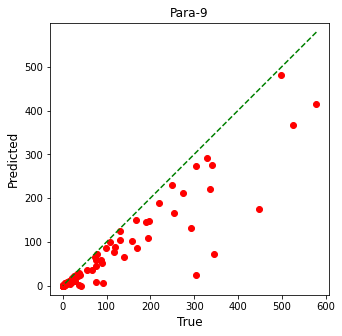

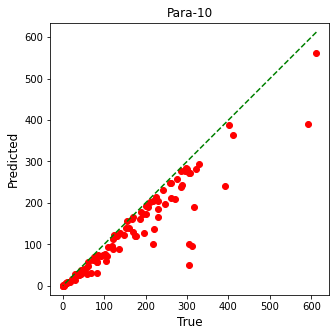

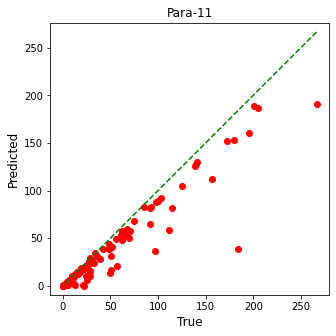

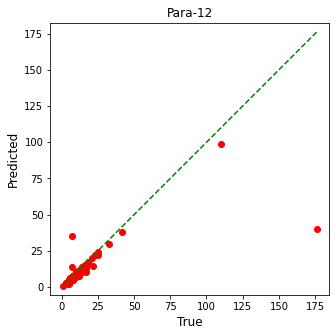

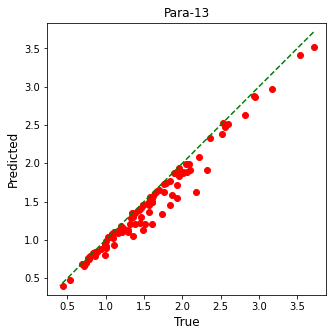

In [20]:
generator = []
for i in range(101):
  generator.append(i)
headers = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']
for i in range(5):
  plt.figure(figsize=(5, 5))
  predicted_value = df_pred.iloc[generator, i]
  true_value = test_data.iloc[generator, i + 10]
  plt.scatter(true_value, predicted_value, c='red')
  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.plot([p1, p2], [p1, p2], 'g--')
  plt.title(headers[i])
  plt.xlabel('True', fontsize=12)
  plt.ylabel('Predicted', fontsize=12)
  plt.axis('equal')
  plt.show()